# Tornado Data - Time Series Analysis

In [73]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [74]:
# Import data
path = r'C:\Users\lydia\OneDrive\Documents\Career Foundry Data\Data Immersion\Acheivement 6\Prepared Data'
df = pd.read_csv(os.path.join(path, 'Tornado Data.csv'),index_col = False)

In [75]:
df.head()

,Unnamed: 0,year,month,day,date,states,mag,injuries,deaths,starting lat,starting lon,ending lat,ending lon,length in miles,width in yards,wind speed,potential damage
0,0,1950,1,3,1950-01-03,Illinois,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,136-165 mph,Severe damage
1,1,1950,1,3,1950-01-03,Missouri,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,136-165 mph,Severe damage
2,2,1950,1,3,1950-01-03,Ohio,1.0,1,0,40.88,-84.58,0.00,0.00,0.1,10,85-110 mph,Moderate damage
3,3,1950,1,13,1950-01-13,Arkansas,3.0,1,1,34.40,-94.37,0.00,0.00,0.6,17,136-165 mph,Severe damage
4,4,1950,1,25,1950-01-25,Illinois,2.0,0,0,41.17,-87.33,0.00,0.00,0.1,100,111-135 mph,Considerable damage


### Data Wrangling

##### Create a dataframe with number of tornadoes per month per year

In [76]:
# Create dataframe with number of tornadoes per date
data1 = df.groupby(df['date']).size()

In [77]:
data1.head()

date
1950-01-03    3
1950-01-13    1
1950-01-25    2
1950-01-26    1
1950-02-11    4
dtype: int64

In [78]:
data1 = pd.DataFrame(data1)

In [80]:
data1.head()

,0
date,
1950-01-03,3
1950-01-13,1
1950-01-25,2
1950-01-26,1
1950-02-11,4


In [81]:
data1 = data1.reset_index()

In [82]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12300 entries, 0 to 12299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    12300 non-null  object
 1   0       12300 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 192.3+ KB


In [83]:
data1['date'] = pd.to_datetime(data1['date'])
data1['date']

0       1950-01-03
1       1950-01-13
2       1950-01-25
3       1950-01-26
4       1950-02-11
           ...    
12295   2021-12-18
12296   2021-12-21
12297   2021-12-29
12298   2021-12-30
12299   2021-12-31
Name: date, Length: 12300, dtype: datetime64[ns]

In [84]:
data1['year'] = data1['date'].dt.year
data1['month'] = data1['date'].dt.month
data1['day'] = data1['date'].dt.day

In [85]:
data1.head()

,date,0,year,month,day
0,1950-01-03,3,1950,1,3
1,1950-01-13,1,1950,1,13
2,1950-01-25,2,1950,1,25
3,1950-01-26,1,1950,1,26
4,1950-02-11,4,1950,2,11


In [104]:
data1['Year-Month'] = pd.to_datetime(data1[['year', 'month']].assign(day=1))

In [105]:
data1.head()

,date,number of tornadoes,year,month,day,Year-Month
0,1950-01-03,3,1950,1,3,1950-01-01
1,1950-01-13,1,1950,1,13,1950-01-01
2,1950-01-25,2,1950,1,25,1950-01-01
3,1950-01-26,1,1950,1,26,1950-01-01
4,1950-02-11,4,1950,2,11,1950-02-01


In [90]:
data2 = data1.drop(columns = {'date', 'year', 'month', 'day'})

In [103]:
data2.head()

,0
Year-Month,
1950-01-01,7
1950-02-01,20
1950-03-01,21
1950-04-01,15
1950-05-01,61


In [92]:
data2 = data2.groupby(data2['Year-Month']).sum()

In [107]:
data2 = data2.rename(columns = {0: 'number of tornadoes'})

In [108]:
data2.head()

,number of tornadoes
Year-Month,
1950-01-01,7
1950-02-01,20
1950-03-01,21
1950-04-01,15
1950-05-01,61


### Plot graph

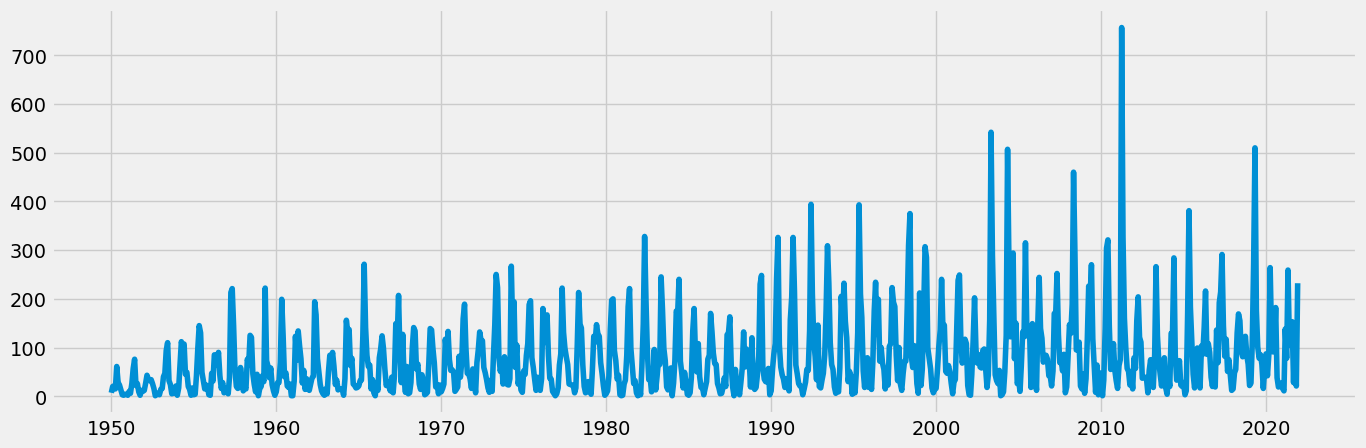

In [94]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data2)

### Decomposition

In [96]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data2, model='additive', period = 12)

In [97]:
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

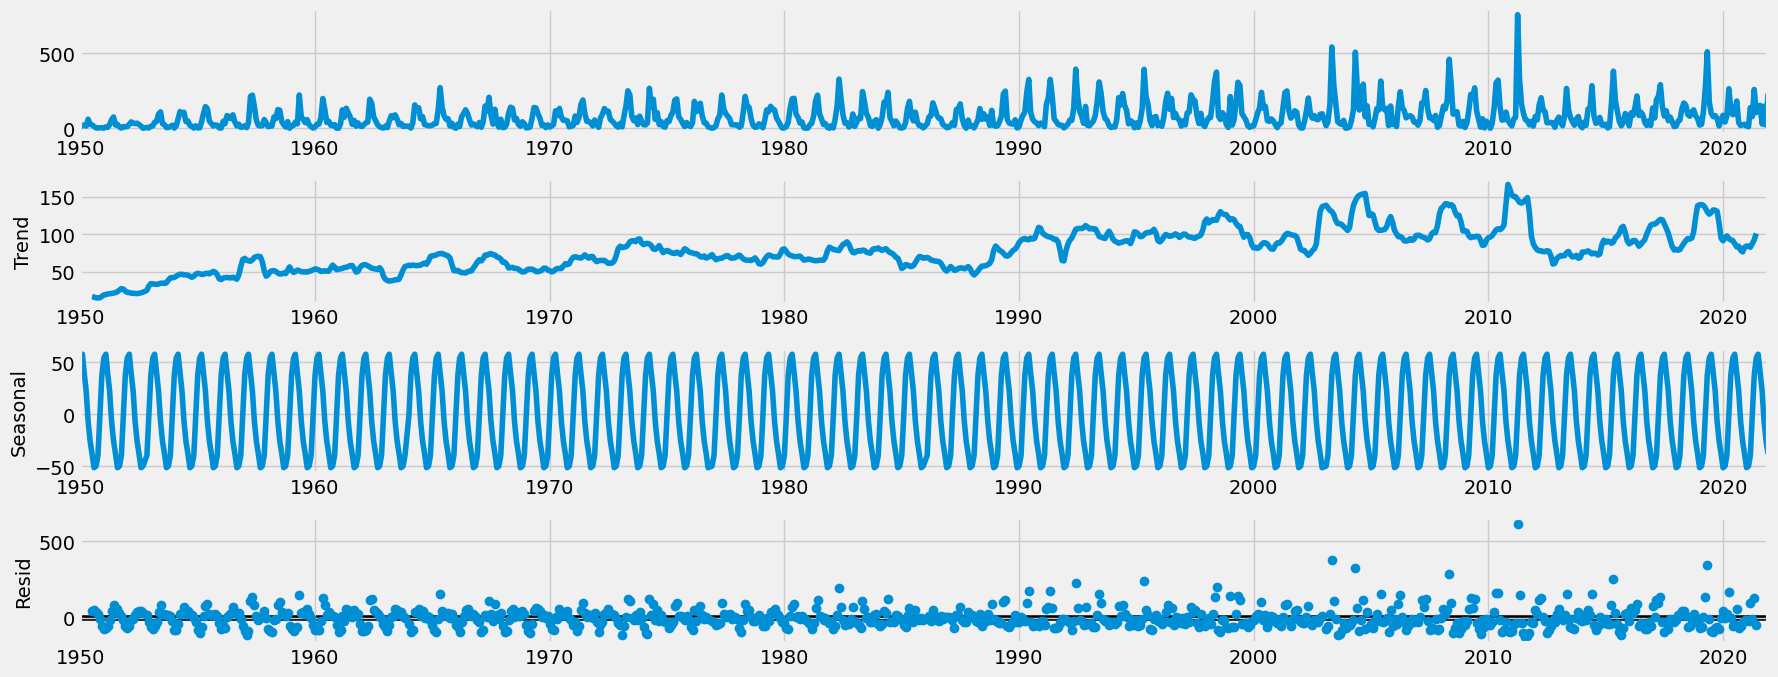

In [98]:
# Plot the separate components

decomposition.plot()
plt.show()

Once the seasonaility and noise is removed we can see that there is a gradual uphill trend in the number of tornadoes from 1950 to 2021. However, in more recent years (since 2000) there is greater fluctuation with when more or less tornadoes have occurred. This is expected given many factors will contribute towards when tornadoes occur. In addition, in the earlier years the number of tornadoes may be affected by how many were actually reported, given reporting will have improved in more recent years.

### Dickey-Fuller Test

In [109]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data2['number of tornadoes'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.698641
p-value                          0.004132
Number of Lags Used             12.000000
Number of Observations Used    846.000000
Critical Value (1%)             -3.438103
Critical Value (5%)             -2.864962
Critical Value (10%)            -2.568592
dtype: float64


My test statistic is smaller than all the critical values and I have a satisfactory p value. 
Therefore, I can reject the null hypothesis that there is a unit root and consider my series stationary.

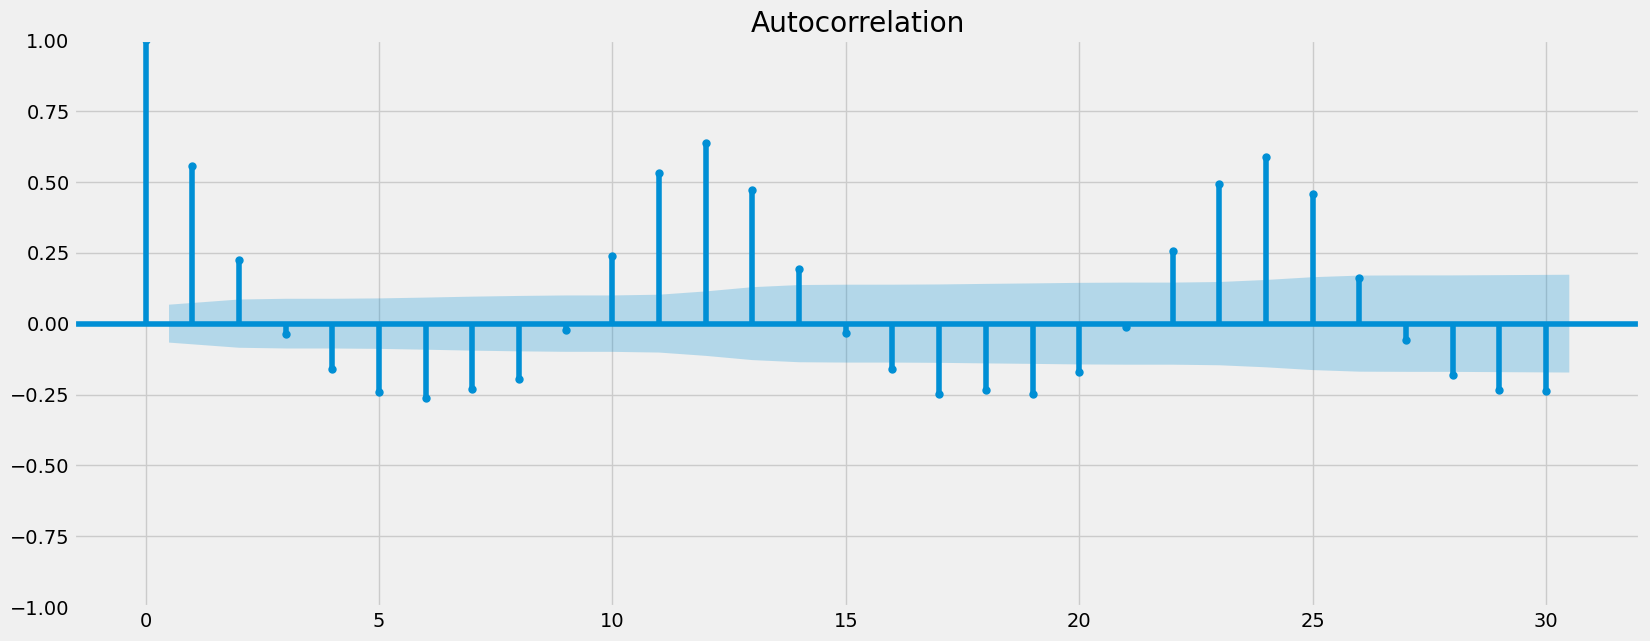

In [110]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data2)
plt.show()

Given not all of the lags are within the confidence interval suggests that the stationarity is weak. There are over 10 lags which are outside the confidence interval. I will therefore stationarise my data in order to improve the stationarity. 

### Stationarizing the data

In [111]:
data_diff = data2 - data2.shift(1)

In [112]:
data_diff.dropna(inplace = True)

In [113]:
data_diff.head()

,number of tornadoes
Year-Month,
1950-02-01,13.0
1950-03-01,1.0
1950-04-01,-6.0
1950-05-01,46.0
1950-06-01,-33.0


In [114]:
data_diff.columns

Index(['number of tornadoes'], dtype='object')

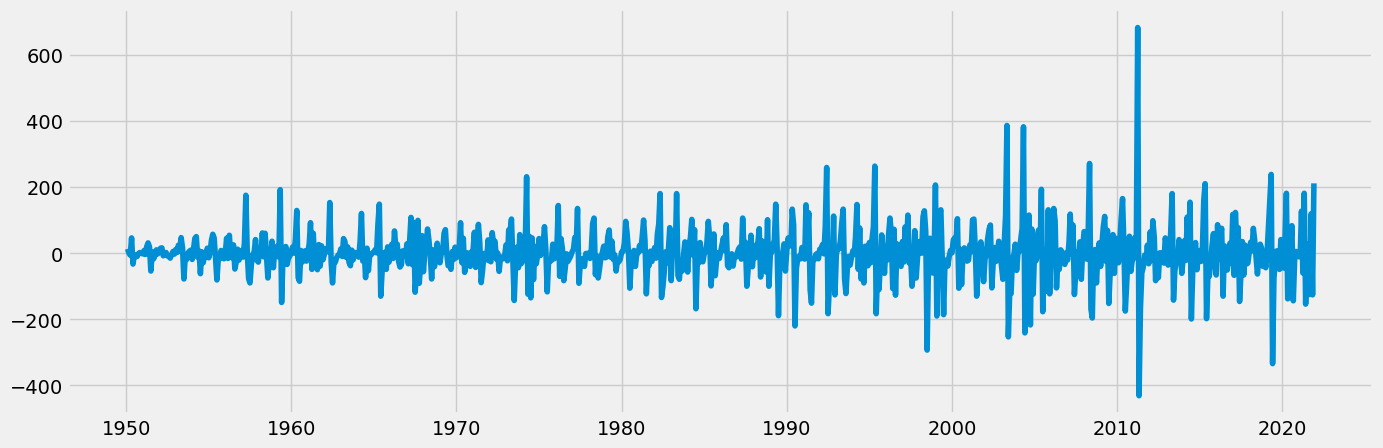

In [115]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [116]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.040741e+01
p-value                        1.841440e-18
Number of Lags Used            2.100000e+01
Number of Observations Used    8.360000e+02
Critical Value (1%)           -3.438196e+00
Critical Value (5%)           -2.865003e+00
Critical Value (10%)          -2.568614e+00
dtype: float64


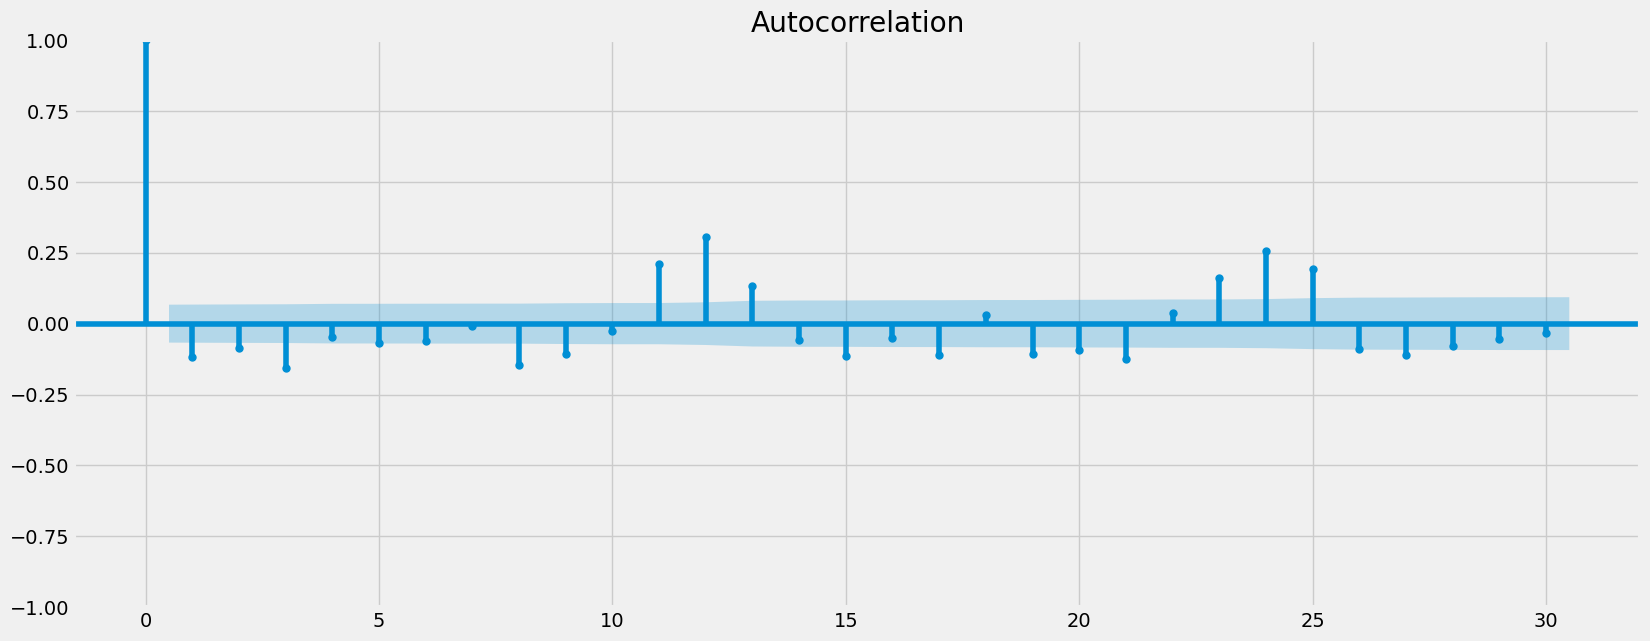

In [117]:
plot_acf(data_diff)
plt.show()

This test for autocorrelation indicates a series with much more stationarity.